In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

In [8]:
root = 'data/train/'
root_valid = 'data/valid'
root_test = 'data/test'

# Exporatory Data Analysis
There are 400 species in the data set. How many total images and what are some examples?

In [6]:
# How many total images are there?

def image_count(num_species, root): # Counts the number of training images for a set number of species
    birds = os.listdir(root)
    birds = [bird for bird in birds if bird[0]!='.']
    num_images = 0
    for i, bird in enumerate(birds):
        if i == num_species: break
        num_images += len(os.listdir(root + f'/{bird}'))
    return num_images

In [10]:
num_species = 400
num_images = image_count(num_species, root)
print(f'There are {num_species} species and {num_images} total training images')
num_images = image_count(num_species, root_valid)
print(f'There are {num_species} species and {num_images} total validation images')
num_images = image_count(num_species, root_test)
print(f'There are {num_species} species and {num_images} total testing images')

There are 400 species and 58388 total training images
There are 400 species and 2000 total validation images
There are 400 species and 2000 total testing images


Validation and testing have 20 images per species.

One example image (jpg):

![sample image](data/001.jpg)

In [11]:
species = os.listdir(root)
species[:4]

['CREAM COLORED WOODPECKER',
 'RUFUOS MOTMOT',
 'WHITE TAILED TROPIC',
 'KOOKABURRA']

In [22]:
# Remove one hidden file
if os.path.exists(root + ".DS_Store"):
    os.remove(root + ".DS_Store")
else:
    print("The file does not exist") 

In [12]:
# Assemble dict with counts of each species
counts = []
for bird in species:
    try:
        counts += [len(os.listdir(root+bird))]
    except NotADirectoryError: 
        continue
    except FileNotFoundError:
        continue
counts = {v:k for v,k in zip(species, counts)}
[print(f'{x}: {counts[x]}') for x in species[:5]];

CREAM COLORED WOODPECKER: 139
RUFUOS MOTMOT: 189
WHITE TAILED TROPIC: 175
KOOKABURRA: 143
TREE SWALLOW: 181


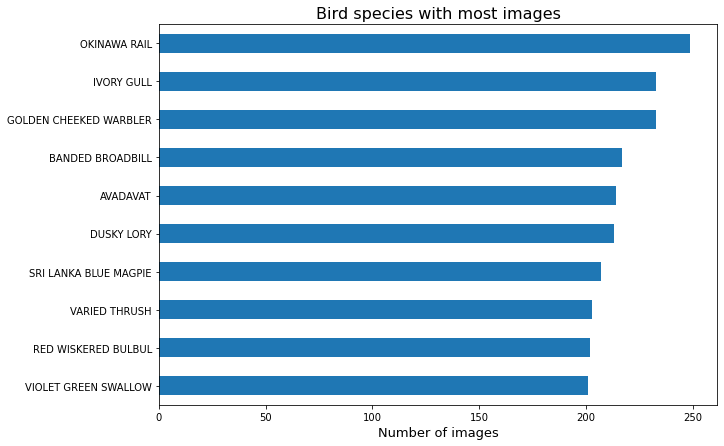

In [22]:
pd.Series(counts).sort_values(ascending=True)[-10:].plot(kind='barh', figsize=(10,7));
plt.xlabel('Number of images', fontsize=13);
plt.title('Bird species with most images', fontsize=16);

There are a minimum of 120 images per species with a max of 249.